# Introduction
This notebook involves the implemetations of various data analysis and a machine learning model to predict loan risk / probability of loan repayment on a given applicant. The solution proposed is a binary classification where the two classes are:

    i)  paid    (1): The loan has been paid off   
    ii) no_paid (0): The loan is not paid off

In [1]:
from functions import *

# Load dataset

In [2]:
loan = pd.read_csv('loan.csv', parse_dates=['applicationDate','originatedDate'])  
payment = pd.read_csv('payment.csv', parse_dates=['paymentDate']) 

# View dataset

In [3]:
loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01 13:51:14.709,False,NaT,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06 23:58:08.880,False,NaT,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05 22:31:34.304,False,NaT,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [4]:
payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19 05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02 05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16 05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30 05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13 05:00:00,43.89,125.72,169.61,Checked,NaN


# Check data type

In [5]:
loan.dtypes

loanId                                      object
anon_ssn                                    object
payFrequency                                object
apr                                        float64
applicationDate                     datetime64[ns]
originated                                    bool
originatedDate                      datetime64[ns]
nPaidOff                                   float64
approved                                      bool
isFunded                                     int64
loanStatus                                  object
loanAmount                                 float64
originallyScheduledPaymentAmount           float64
state                                       object
leadType                                    object
leadCost                                     int64
fpStatus                                    object
clarityFraudId                              object
hasCF                                        int64
dtype: object

In [6]:
payment.dtypes

loanId                       object
installmentIndex              int64
isCollection                   bool
paymentDate          datetime64[ns]
principal                   float64
fees                        float64
paymentAmount               float64
paymentStatus                object
paymentReturnCode            object
dtype: object

# Basic statistics

To investigate whether there could be missing values in each column.

To have an idea of the distribution for each column (based on their mean values, quartiles).

In [7]:
loan.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577658.000000,577682.000000,575432.000000,577682.000000,577682.000000,577682.000000
mean,553.080972,0.037887,0.067480,514.245084,1428.897209,7.854389,0.619187
std,110.046159,0.333366,0.250852,320.939929,925.009141,12.853451,0.485587
min,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,350.000000,1023.640000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,500.000000,1245.250000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,21.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


Based on the 'count' parameter, there are some columns could have missing values, imputation may be needed.

Based on the 'mean' parameter, the values between columns vary a lot, standardization/normalization is needed.

In [8]:
payment.describe()

,installmentIndex,principal,fees,paymentAmount
count,689364.000000,689364.000000,689364.000000,689364.000000
mean,10.553222,45.557543,67.003994,112.680232
std,8.049530,81.724683,59.789510,105.783710
min,1.000000,-303.370000,-42.560000,-337.700000
25%,5.000000,13.180000,28.820000,56.810000
50%,9.000000,27.610000,51.300000,86.340000
75%,14.000000,53.380000,86.440000,135.090000
max,105.000000,4000.000000,1257.710000,4063.600000


Based on the 'count' parameter, there could be no missing values.

Based on the 'mean' parameter, the values between columns vary a lot, standardization/normalization is needed.

In [9]:
loan.describe(include=['O'])

,loanId,anon_ssn,payFrequency,loanStatus,state,leadType,fpStatus,clarityFraudId
count,577426,577682,576409,577291,577550,577682,51723,357693
unique,577426,459393,5,21,44,10,8,314915
top,LL-I-06994240,c8bb49de1f8ff99d2ecddfb7037dc66e,B,Withdrawn Application,OH,bvMandatory,Checked,561e95f7e4b0efa8a6cdc975
freq,1,35,316654,450984,90496,475001,32978,15


In [10]:
payment.describe(include=['O'])

,loanId,paymentStatus,paymentReturnCode
count,689364,689364,31533
unique,39952,9,31
top,LL-I-09757835,Cancelled,R01
freq,105,270334,22866


# Determine targets

The target of each row is determined from the values at 'loanStatus' column.

Values with either 'External Collection','Internal Collection','Settled Bankruptcy' or 'Charged Off' are classified as 'no_paid'.

Values with either 'Paid Off Loan','Settlement Paid Off' or 'Charged Off Paid Off' are classified as 'paid'.

Values that are not stated are ignored.
        

In [11]:
no_paid = ['External Collection','Internal Collection','Settled Bankruptcy','Charged Off']
paid = ['Paid Off Loan','Settlement Paid Off','Charged Off Paid Off']

def label(x):
    if x in no_paid:
        return 0
    elif x in paid:
        return 1

loan['targets'] = loan['loanStatus'].apply(label)
loan = loan[loan['targets'].notna()].reset_index(drop=True)

# Feature engineering for loan dataset

Columns with missing values are determined.

In [12]:
loan.isna().sum()

loanId                                 0
anon_ssn                               0
payFrequency                           1
apr                                    0
applicationDate                        0
originated                             0
originatedDate                         5
nPaidOff                              21
approved                               0
isFunded                               0
loanStatus                             0
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                              12
clarityFraudId                      4997
hasCF                                  0
targets                                0
dtype: int64

It shows that 'payFrequency','originatedDate', 'nPaidOff' and 'clarityFraudId' have missing values.

Rows with missing values at 'payFrequency','originatedDate' and 'nPaidOff' are dropped. Missing values at column 'fpStatus' are filled with 'None' value.

In [13]:
remove = ['payFrequency','originatedDate','nPaidOff']
drop_rows = []
for d in remove:
    idx = list(loan[loan[d].isna()].index)
    drop_rows += idx

#Remove rows that have missing values for 'payFrequency','originatedDate','nPaidOff'
loan = loan.drop(drop_rows)

#Fill in 'None' for fpStatus missing values
loan["fpStatus"].fillna("None", inplace = True)

In [14]:
#Verify if the unwanted rows have been removed
loan.isna().sum()

loanId                                 0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originated                             0
originatedDate                         0
nPaidOff                               0
approved                               0
isFunded                               0
loanStatus                             0
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                               0
clarityFraudId                      4978
hasCF                                  0
targets                                0
dtype: int64

# Feature engineering for payment dataset

In [15]:
#Check if there are any missing values in 'payment' dataset
payment.isna().sum()

loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0
paymentAmount             0
paymentStatus             0
paymentReturnCode    657831
dtype: int64

The 'paymentStatus' column is pivoted to indicate the total number of time achieved for each payment status for each loanId. The average payment made by each loanId is also collected for model training.

In [16]:
#Types of paymentstatus:
#'Checked','Rejected','Cancelled','None','Skipped','Returned','Pending','Rejected Awaiting Retry','Complete'
payment['count'] = 1
payment_status = pd.pivot_table(payment, values='count', index=['loanId'],columns=['paymentStatus'], aggfunc=np.sum)
payment_status = payment_status.fillna(0)

avg_payment_amount = payment.groupby(['loanId'])['paymentAmount'].mean().to_frame()
avg_payment_amount = avg_payment_amount.reset_index()

# Merge data from loan and payment datasets

In [17]:
data = pd.merge(loan,avg_payment_amount,left_on='loanId',right_on='loanId',how='left')
data = pd.merge(data,payment_status,left_on='loanId',right_on='loanId',how='left')

In [18]:
data.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,paymentAmount,Cancelled,Checked,Complete,None,Pending,Rejected,Rejected Awaiting Retry,Returned,Skipped
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,283.458800,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,True,2017-01-31 18:00:14.520,2.0,True,1,...,357.502308,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,True,2016-08-29 15:05:04.014,0.0,True,1,...,187.083077,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,404.1,2016-05-25 03:05:18.849,True,2016-05-25 15:11:36.260,3.0,True,1,...,18.754815,21.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LL-I-18297678,bc500677542783c43842d54e34830f08,B,315.0,2017-03-12 18:24:46.356,True,2017-03-12 19:00:23.818,2.0,True,1,...,221.174615,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0


New columns are created: 'dayDiff', 'num_instalments'. The new columns are believed to be helpful in output prediction.

In [19]:
data['dayDiff']=((data['originatedDate'] - data['applicationDate']).dt.days)
data['num_instalments'] = (data['originallyScheduledPaymentAmount'] / data['paymentAmount']).apply(ceil)

In [20]:
#Check if there are any missing values in the merged dataset
data.isna().sum()

loanId                                 0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originated                             0
originatedDate                         0
nPaidOff                               0
approved                               0
isFunded                               0
loanStatus                             0
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                               0
clarityFraudId                      4978
hasCF                                  0
targets                                0
paymentAmount                         14
Cancelled                             14
Checked                               14
Complete                              14
None            

Rows with missing values are removed.

In [21]:
remove = ['paymentAmount','Cancelled','Checked','Complete','None','Pending','Rejected',
        'Rejected Awaiting Retry','Returned','Skipped','dayDiff','num_instalments']

drop_rows = []
for d in remove:
    idx = list(data[data[d].isna()].index)    
    for i in idx:
        if i not in drop_rows:
            drop_rows.append(i)

data = data.drop(drop_rows)

In [22]:
data.isna().sum()

loanId                                 0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originated                             0
originatedDate                         0
nPaidOff                               0
approved                               0
isFunded                               0
loanStatus                             0
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                               0
clarityFraudId                      4978
hasCF                                  0
targets                                0
paymentAmount                          0
Cancelled                              0
Checked                                0
Complete                               0
None            

Unwanted columns are removed

In [23]:
not_needed = ['loanId','anon_ssn','clarityFraudId','applicationDate','originatedDate','isFunded']
data = data.drop(not_needed, axis=1)

In [24]:
data.head()

,payFrequency,apr,originated,nPaidOff,approved,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,...,Checked,Complete,None,Pending,Rejected,Rejected Awaiting Retry,Returned,Skipped,dayDiff,num_instalments
0,B,199.0,True,0.0,True,Paid Off Loan,3000.0,6395.19,CA,prescreen,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23.0
1,S,490.0,True,2.0,True,Paid Off Loan,1250.0,3313.78,MO,organic,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10.0
2,B,590.0,True,0.0,True,Paid Off Loan,800.0,2432.08,CA,bvMandatory,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,13.0
3,W,404.1,True,3.0,True,Paid Off Loan,300.0,422.64,WI,organic,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23.0
4,B,315.0,True,2.0,True,Internal Collection,1500.0,2875.27,IL,organic,...,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0,13.0


# Encode categorical data

In [25]:
transform = ['payFrequency','originated','approved','loanStatus','state','leadType','fpStatus']

for t in transform:
    convert = LabelEncoder()
    data[t] = convert.fit_transform(data[t])
    
    name_mapping = dict(zip(convert.classes_, convert.transform(convert.classes_)))
    print(t+':',name_mapping,'\n')

payFrequency: {'B': 0, 'I': 1, 'M': 2, 'S': 3, 'W': 4} 

originated: {True: 0} 

approved: {True: 0} 

loanStatus: {'Charged Off': 0, 'Charged Off Paid Off': 1, 'External Collection': 2, 'Internal Collection': 3, 'Paid Off Loan': 4, 'Settled Bankruptcy': 5, 'Settlement Paid Off': 6} 

state: {'AK': 0, 'AL': 1, 'AZ': 2, 'CA': 3, 'CO': 4, 'CT': 5, 'DE': 6, 'FL': 7, 'GA': 8, 'HI': 9, 'IA': 10, 'ID': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MD': 17, 'MI': 18, 'MN': 19, 'MO': 20, 'MS': 21, 'NC': 22, 'ND': 23, 'NE': 24, 'NJ': 25, 'NM': 26, 'NV': 27, 'OH': 28, 'OK': 29, 'PA': 30, 'RI': 31, 'SC': 32, 'SD': 33, 'TN': 34, 'TX': 35, 'UT': 36, 'VA': 37, 'WA': 38, 'WI': 39, 'WY': 40} 

leadType: {'bvMandatory': 0, 'california': 1, 'express': 2, 'instant-offer': 3, 'lead': 4, 'lionpay': 5, 'organic': 6, 'prescreen': 7, 'rc_returning': 8, 'repeat': 9} 

fpStatus: {'Cancelled': 0, 'Checked': 1, 'None': 2, 'Rejected': 3, 'Returned': 4, 'Skipped': 5} 



The encoding shows that 'originated' and 'approved' have only 1 unique value each. So both the columns are removed since they do not have great impact towards output prediction.

In [26]:
not_needed = ['originated','approved']
data = data.drop(not_needed, axis=1)

Continuous, discrete, categorical data are determined from the merged dataset.

In [27]:
continuous_var = ['apr', 'loanAmount','originallyScheduledPaymentAmount','paymentAmount']

discrete_var = ['nPaidOff','payFrequency','leadCost', 'dayDiff','num_instalments', 'Cancelled', 'Checked', 'Complete', 
                 'None','Pending', 'Rejected', 'Rejected Awaiting Retry', 'Returned','Skipped']

categorical_var = ['loanStatus', 'state', 'leadType', 'fpStatus', 'hasCF']

len(continuous_var), len(discrete_var), len(categorical_var)

(4, 14, 5)

# Data Analysis

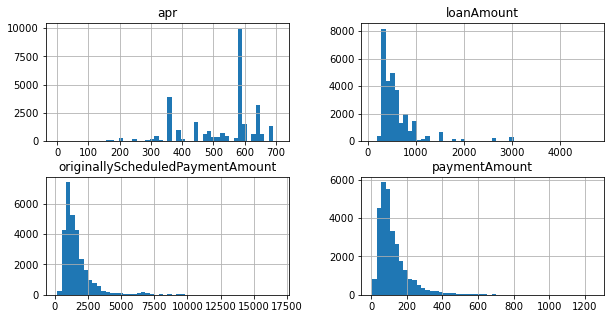

In [28]:
#histograms for continuous variables
data[continuous_var].hist(bins=50, figsize=(10,5))
plt.show()

All continuous data in the dataset are skewed:

    i) Right-skewed: 'loanAmount', 'originallyScheduledPaymentAmount', 'paymentAmount'
    ii) Left-skewed: 'apr'
    

In [29]:
#histograms for categorical variables
#data[discrete_var].hist(bins=50, figsize=(10,5))
#plt.show()

#histograms for categorical variables
#data[categorical_var].hist(bins=50, figsize=(10,5))
#plt.show()

To further verify skewness in the data, QQ plot is used (QQ plot is used for normality check and skewness detection).

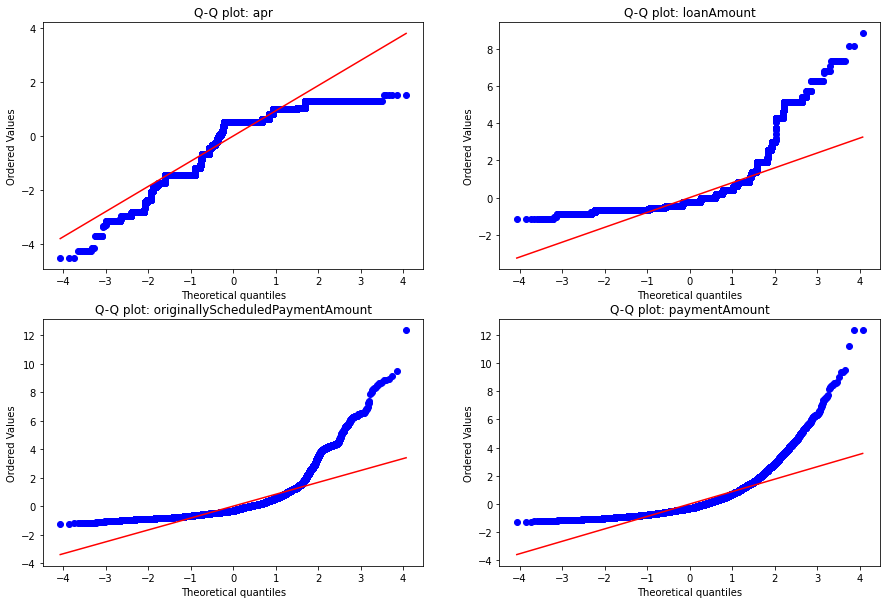

In [30]:
data2 = qq_plot(data.copy(),continuous_var)

The plots indicated that the variables are not normally distributed (skewed) and this means there could be outliers that can affect the model's performance.

*if the blue line does not align with the red line, it means that the variable| is not normally distribtued (skewed).

To verify if there are outliers in the data, boxplot is used. Boxplots below showed the distribution of class 1 (paid) and class 0 (no_paid) for each continuous variable.

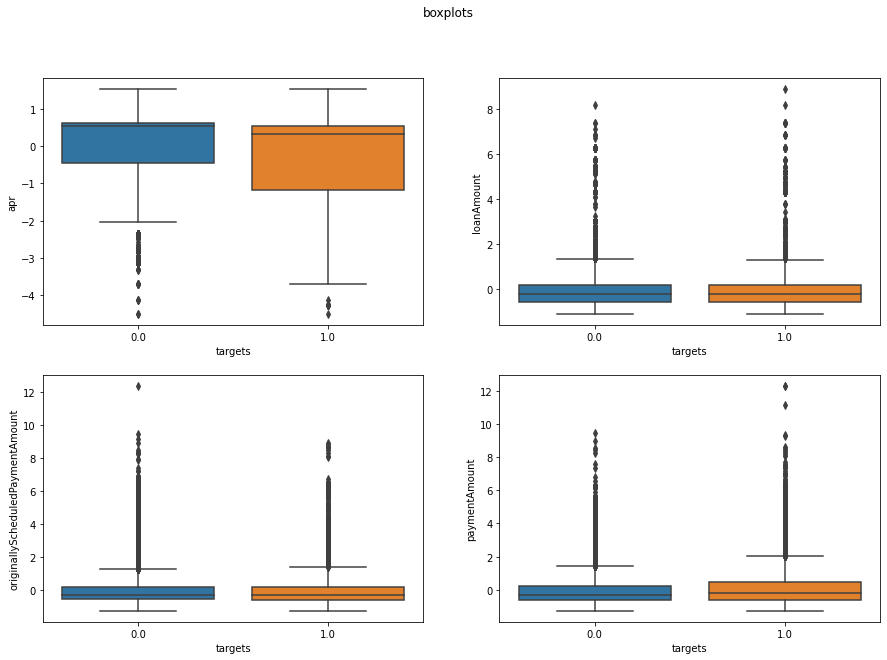

In [31]:
boxplots(data2, continuous_var)

It is shown that there are a lot of outliers in all the continuous variables. 'apr' showed the most skewness, then 'originallyScheduledPaymentAmount' and 'paymentAmount', then 'loanAmount'.

To reduce the skewness among data, log-transform on the variables is carried out.

In [32]:
ix = data[data['apr'] == 0].index

for i in ix:
    data.at[i,'apr']=0.001

data = log_transform(data.copy(),continuous_var)  

apr
Skewness (before): -0.943180814213164
Skewness (after): -9.772536912263698 

loanAmount
Skewness (before): 3.336641152832896
Skewness (after): 1.0722229392196798 

originallyScheduledPaymentAmount
Skewness (before): 3.1308470008819578
Skewness (after): 0.718661451447673 

paymentAmount
Skewness (before): 2.6435717237447007
Skewness (after): 0.23922866041818966 



It can be seen (above) that the skewness on each variable reduces after log-transform has been applied. The decrease in skewness can be further verified through QQ plots (shown below).

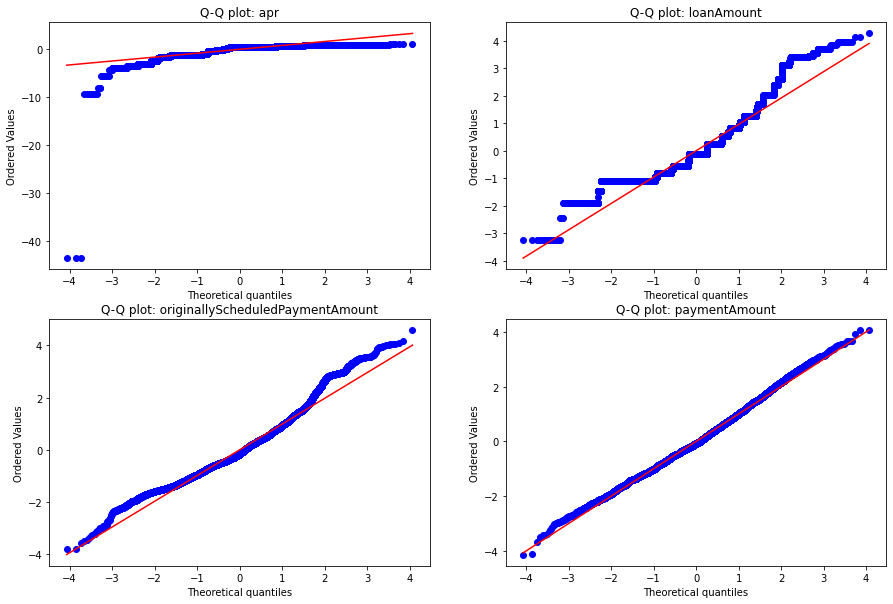

In [33]:
data = qq_plot(data.copy(),continuous_var)

The QQ plots showed that the normality and skewness have improved after log-transform.

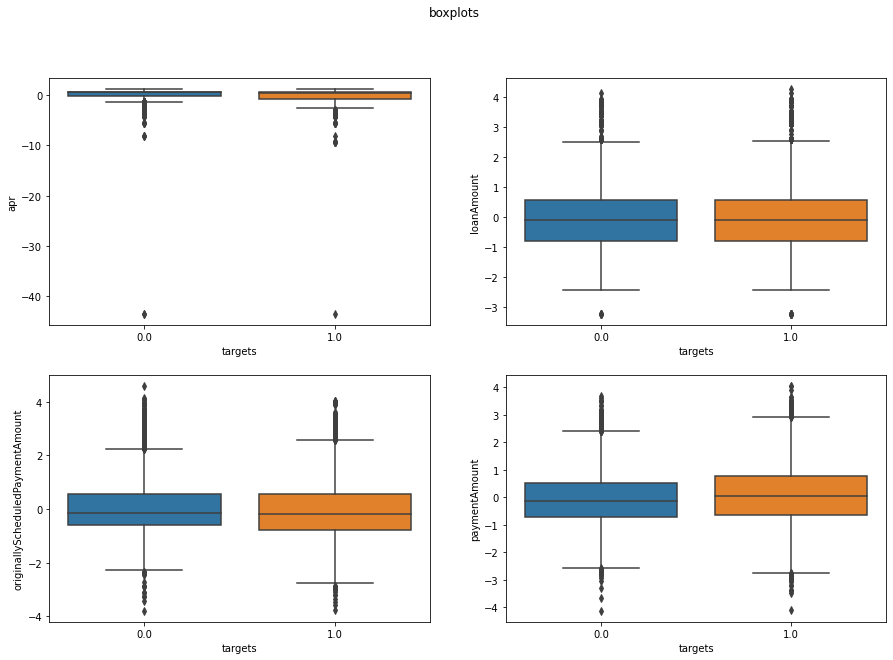

In [34]:
boxplots(data, continuous_var)

The boxplots also showed improvements of normality for each variable. The underlying outliers have also become less extreme.

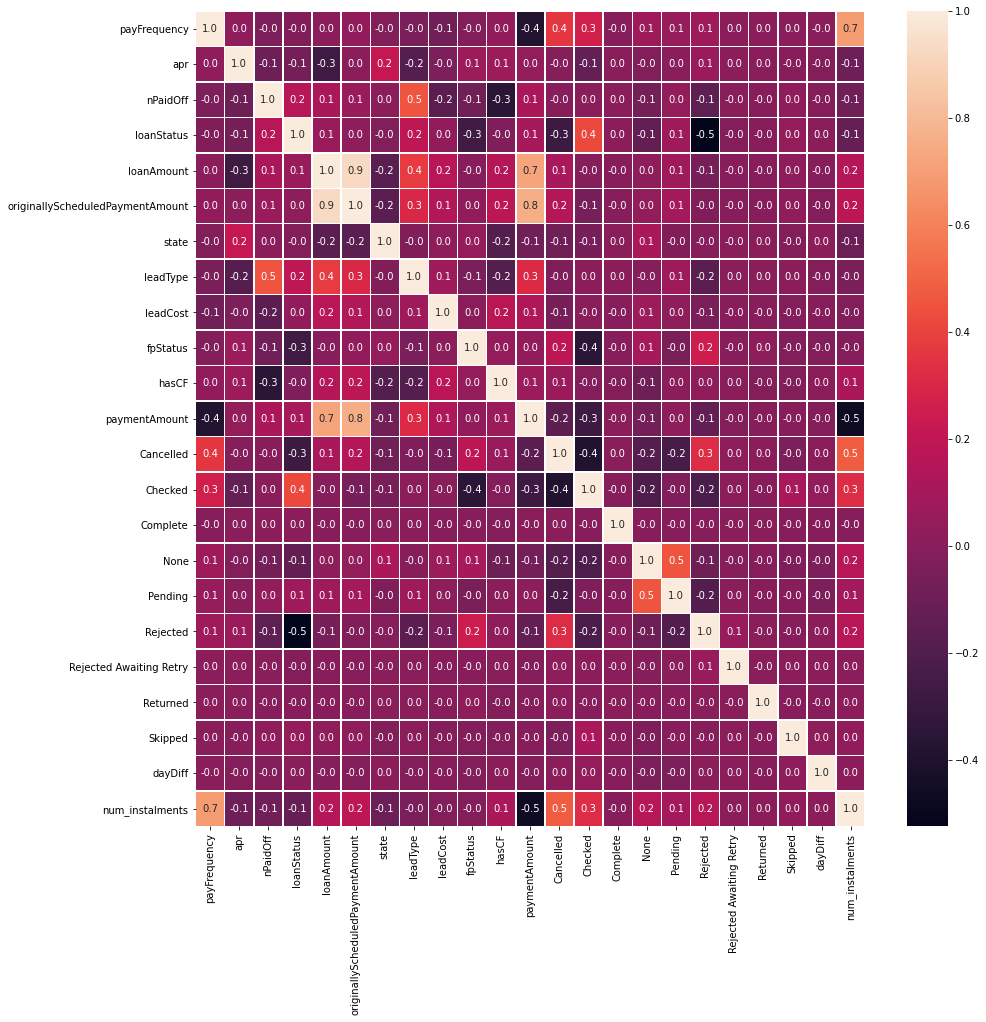

In [35]:
#Check for correlation between variables
plot_corr(data,'targets') 

The heatmap showed that some variables are highly correlated to each other.

High correlations between variables may cause a problem called multicollinearity (one variable is highly linearly related to another). This means that any change on a variable can trigger the same changes on other correlated variables. This makes the training difficult as it becomes more challenging to estimate one-to-one relationship between an independent variable and dependent variable.

Hence, highly correlated variables (with correlation coefficient > 0.6) have to be filtered out.

In [36]:
#Find highly correlated pairs
find_high_corr_pairs(data)

[{0.6904145939093356, 'num_instalments', 'payFrequency'},
 {0.8181593201424444, 'loanStatus', 'targets'},
 {0.9264891954547029, 'loanAmount', 'originallyScheduledPaymentAmount'},
 {0.7208274553509589, 'loanAmount', 'paymentAmount'},
 {0.7598740622642127, 'originallyScheduledPaymentAmount', 'paymentAmount'}]

To quantify the extend of correlations between one variable with other varibles, Variance Inflation Factor (VIF) of each varibale is calculated. The following steps are repeated until each VIF < 10. The variable with the highest VIF is removed at each step.

In [37]:
calculate_vif(data.copy())

,feature,VIF
3,loanStatus,28.005348
4,loanAmount,17.841257
5,originallyScheduledPaymentAmount,27.151129
12,paymentAmount,12.292700
13,Cancelled,12.691335
14,Checked,12.490793
23,num_instalments,62.084607


In [38]:
data = drop(data,'num_instalments')
calculate_vif(data.copy())

,feature,VIF
3,loanStatus,24.039965
4,loanAmount,17.453084
5,originallyScheduledPaymentAmount,21.853438


In [39]:
data = drop(data,'loanStatus')
calculate_vif(data.copy())

,feature,VIF
3,loanAmount,17.312809
4,originallyScheduledPaymentAmount,21.627945


In [40]:
data = drop(data,'originallyScheduledPaymentAmount')
calculate_vif(data.copy())

,feature,VIF


In [41]:
find_high_corr_pairs(data)

[{0.7208274553509589, 'loanAmount', 'paymentAmount'}]

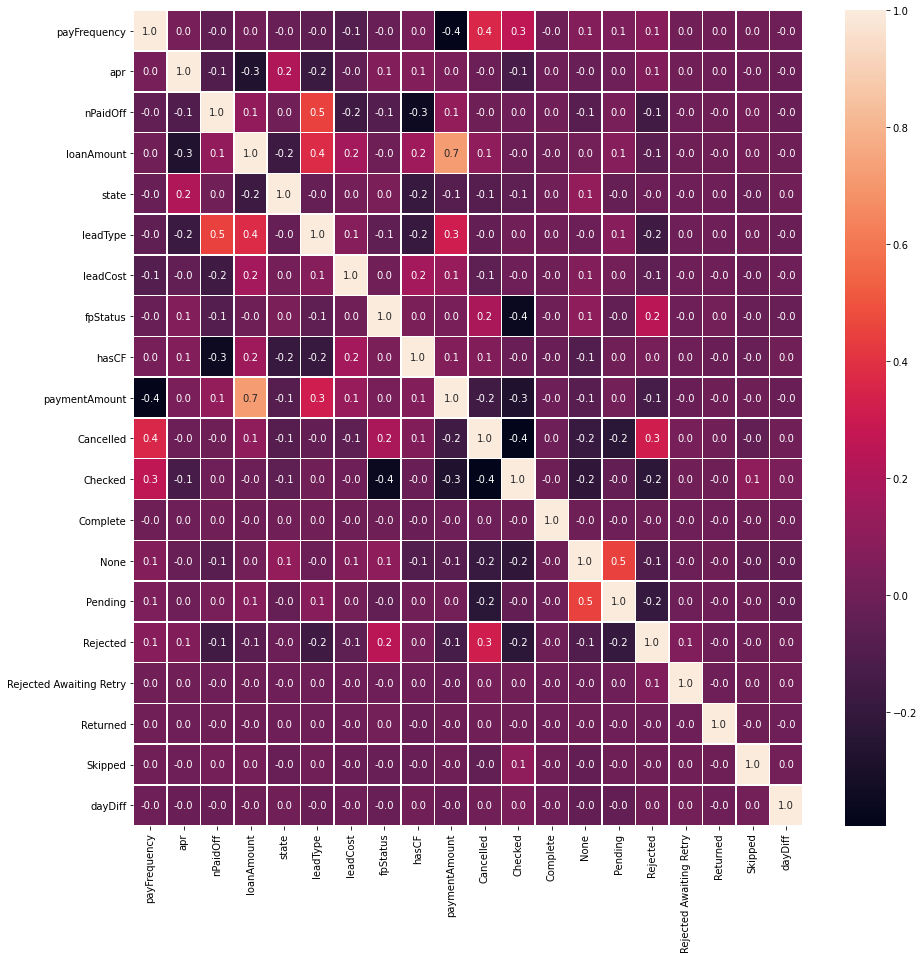

In [42]:
plot_corr(data,'targets')

The heatmap showed that the correlations between varibles have improved.

# Model selection

Based on the investigations carried out, it can be concluded that the data provided are skewed, highly correlated and have many outliers.

However, through the implemetations of log-trnasform and variable-elimination, the effect of skewness, outliers and correlation have improved.

To have good output prediction (in this case), the estimator (model) chosen should have the following characteristics to achieve good performance:

    1) Supervised
    2) Robust to skewness and outliers
    3) Robust to correlations among variables
    
Hence, a Random Forest classifier has been selected as it fulfils all the requirements.

# Model Training

In [43]:
names = list(data.copy().columns)
names.remove('targets')
X = data[names]
Y = data['targets']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=567)

In [44]:
x_train.to_csv('x_train.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [45]:
y_train.value_counts()

0.0    11491
1.0     8262
Name: targets, dtype: int64

The distribution of classes in the training dataset is slightly imbalanced.

In [46]:
model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

model.fit(x_train, y_train)

RandomForestClassifier(max_features='sqrt')

# Model Prediction

Classes {0:No_paid, 1:Paid}

In [47]:
rf_probs = model.predict_proba(x_test)

In [48]:
print('Model output:')
print(rf_probs[:3],'\n')
      
print('Targets:')
print(y_test[:3])

Model output:
[[0.13 0.87]
 [0.84 0.16]
 [0.04 0.96]] 

Targets:
532      1.0
6950     0.0
22775    1.0
Name: targets, dtype: float64


The model outputs two probabilities for each input given: A and B. 

A refers to the probability of no_paid, B refers to the probability of paid. In other words, for a given input, the risk of loan repayment is indicated by the A and B probabilities.

# Confusion Matrix

For in-depth understanding of quality of predictions, a confusion matrix is created.

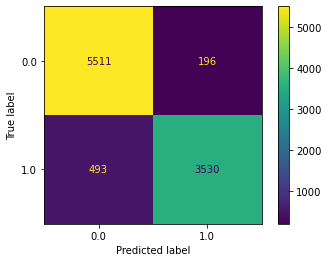

In [49]:
plot_confusion_matrix(model, x_test, y_test) 

In [50]:
rf_predictions = model.predict(x_test)

In [51]:
CM = confusion_matrix(y_test, rf_predictions)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print('TN:',TN)
print('FN:',FN)
print('TP:',TP)
print('FP:',FP)

TN: 5511
FN: 493
TP: 3530
FP: 196


In [52]:
#Precision: How many positive-predicted cases are actually positive
#How relevant the model is to the dataset
precision = TP/(TP+FP)

#Recall / Sensitivity / TP rate: How many actual positive cases have been predicted positive
TPR = TP/(TP+FN)

#Specificity / TN rate: How many actual negative cases have been predicted negative
TNR = TN/(TN+FP)

#FN rate: How many actual positive cases have been falsely predicted as negative
FNR = FN/(TP+FN)

#FP rate: How many actual negative cases have been falsely predicted as positive
FPR = FP/(TN+FP)

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(TPR))
print('Specificity: {:.2f}'.format(TNR))
print('False Negative Rate: {:.2f}'.format(FNR))
print('False Positive Rate: {:.2f}'.format(FPR))

Precision: 0.95
Recall: 0.88
Specificity: 0.97
False Negative Rate: 0.12
False Positive Rate: 0.03


Based on the parameters above, the model achieved good performance.

# Receiver Operating Characteristics (ROC) Curve

The performance of the model can be further verified by plotting ROC Curve. The greater the area under the curve, the better the model at predicting the correct output. ROC Curve is plotted with False Positive Rate as x-axis and True Positive Rate as y-axis.

Text(0.5, 1.0, 'ROC Curves')

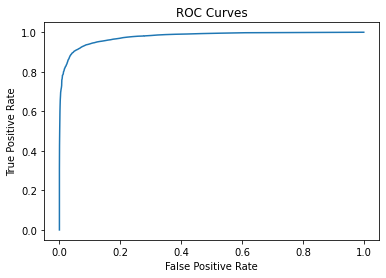

In [53]:
model_fpr, model_tpr, _ = roc_curve(y_test, rf_probs[:, 1])

plt.plot(model_fpr, model_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

In [54]:
roc_value = roc_auc_score(y_test, rf_probs[:,1])

print('Area under ROC Curve: {:.2f}'.format(roc_value), '\nwhich indicates that the model achieved good quality.')

Area under ROC Curve: 0.98 
which indicates that the model achieved good quality.


# Feature importance

The importance of each feature to output prediction is also computed such that more emphasis can be given to that feature when building new models or carrying more data analysis in future.

In [55]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
15,Rejected,0.373783
11,Checked,0.147562
10,Cancelled,0.092301
13,None,0.086708
9,paymentAmount,0.061934


The results show that the variable 'Rejected' influences the most in output prediction.

In [56]:
!jupyter nbconvert --to html MoneyLion_Assessment_JunXuanLee.ipynb

[NbConvertApp] Converting notebook MoneyLion_Assessment_JunXuanLee.ipynb to html
[NbConvertApp] Writing 957138 bytes to MoneyLion_Assessment_JunXuanLee.html
